In [1]:
import numpy as np
from signum.core.time_domain_signal import TimeDomainSignal

## Time domain signals

In [2]:
# define constants: signal size & sampling frequency
SIZE = 1000
FS = 100

### Real-valued signals

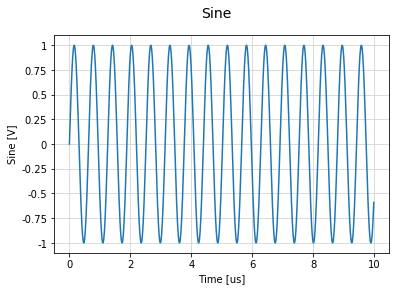

(<Figure size 432x288 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000234A78865B0>],
       dtype=object))

In [3]:
# Signal 1
s1 = np.sin(np.arange(SIZE)*0.1)
s1 = TimeDomainSignal(s1, description='Sine', unit='V', f_sampling=FS, f_sampling_unit='MHz')
s1.display()

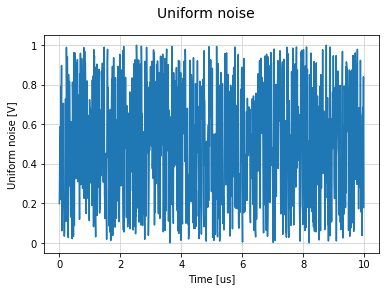

(<Figure size 432x288 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000234A994C730>],
       dtype=object))

In [4]:
# Signal 2
s2 = TimeDomainSignal(np.random.rand(SIZE), description='Uniform noise', unit='V', f_sampling=FS, f_sampling_unit='MHz')
s2.display()

#### Sum of two signals

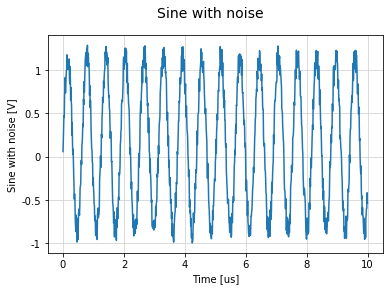

(<Figure size 432x288 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000234A9951B20>],
       dtype=object))

In [5]:
s12 = s1 + 0.3*s2
s12.description = "Sine with noise"
s12.display()

#### Matching core attributes requirement
If certain attributes, such as the sampling frequency, do not match, it is impossible to perform operations such as addition

In [6]:
s3 = TimeDomainSignal(np.arange(SIZE), f_sampling=FS/2, description="Sampling freqmismatch")
try:
    s23 = s2 + s3
except TypeError as e:
    print(e)

Inputs attributes mismatch! ({'unit': 'V', 'x_unit': 's', '_base_resolution': 1, '_t_sampling': 1e-08}, {'unit': '', 'x_unit': 's', '_base_resolution': 1, '_t_sampling': 0.02})


### Complex-valued signals
Several plotting options are implemented

In [7]:
t = np.arange(SIZE) * 0.01
sc = np.cos(t) + 1j*0.3*np.sin(t+0.4)
sc = TimeDomainSignal(sc, f_sampling=FS, description='Complex-valued signal')

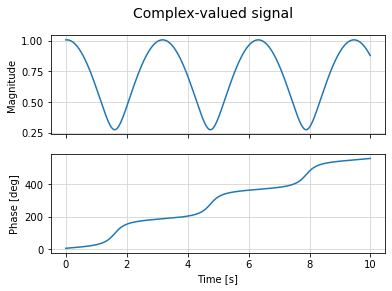

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000234A99E9040>,
       dtype=object))

In [8]:
# default: Bode plot - magnitude and phase
sc.display()

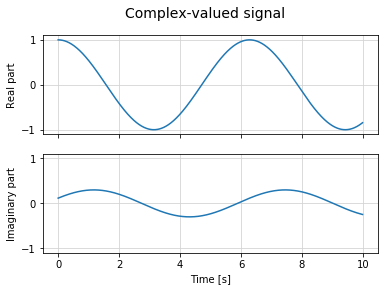

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000234A9A7D970>,
       dtype=object))

In [9]:
# IQ plot (real and imaginary components separated)
sc.display('iq')

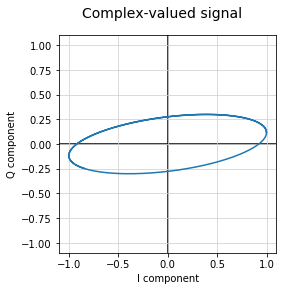

In [10]:
# Nyquist plot
_ = sc.display('nyquist')

## Transition to frequency domain

In [11]:
# Power spectral density: FreqDomainSignal
psd = TimeDomainSignal.psd(s12)
type(psd)

signum.core.freq_domain_signal.FreqDomainSignal

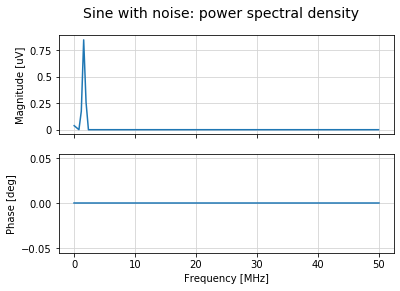

In [12]:
_ = psd.display()

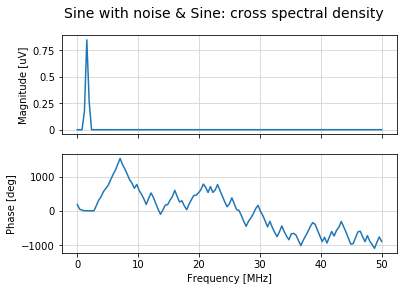

In [13]:
# Cross-spectral density of sine with noise and the sine itself
_ = TimeDomainSignal.csd(s12, s1).display()